# Fish AI

Real time fish counter and identification

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import cv2
from darkflow.net.build import TFNet

# %config InlineBackend.figure_format = 'svg'

/home/ubuntu/anaconda3/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/ubuntu/anaconda3/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/ubuntu/anaconda3/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/ubuntu/anaconda3/lib/python3.6/site-packages/tensorflow/python/framework/dty

In [2]:
options = {
    'model': 'cfg/tiny-yolo-voc-3c.cfg',
#     'load': 'bin/tiny-yolo-voc.weights',
    'load': 900,
    'thresh': 0.2,
    'gpu': 0
}

tfnet = TFNet(options)

Parsing cfg/tiny-yolo-voc-3c.cfg
Loading None ...
Finished in 0.0001480579376220703s

Building net ...

Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------



       |        | input                            | (?, 416, 416, 3)
 Init  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)

 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Init  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Init  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Init  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Init  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 26, 26, 256)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?

In [3]:
!ls test/images/*.jpg

test/images/fish-vid-01-0312.jpg  test/images/fish-vid-01-0346.jpg
test/images/fish-vid-01-0313.jpg  test/images/fish-vid-01-0347.jpg
test/images/fish-vid-01-0314.jpg  test/images/fish-vid-01-0348.jpg
test/images/fish-vid-01-0315.jpg  test/images/fish-vid-01-0349.jpg
test/images/fish-vid-01-0316.jpg  test/images/fish-vid-01-0350.jpg
test/images/fish-vid-01-0317.jpg  test/images/fish-vid-01-0351.jpg
test/images/fish-vid-01-0318.jpg  test/images/fish-vid-01-0352.jpg
test/images/fish-vid-01-0319.jpg  test/images/fish-vid-01-0353.jpg
test/images/fish-vid-01-0320.jpg  test/images/fish-vid-01-0354.jpg
test/images/fish-vid-01-0321.jpg  test/images/fish-vid-01-0355.jpg
test/images/fish-vid-01-0322.jpg  test/images/fish-vid-01-0356.jpg
test/images/fish-vid-01-0323.jpg  test/images/fish-vid-01-0357.jpg
test/images/fish-vid-01-0324.jpg  test/images/fish-vid-01-0358.jpg
test/images/fish-vid-01-0325.jpg  test/images/fish-vid-01-0359.jpg
test/images/fish-vid-01-0326.jpg  test/images/fish-vid-01-0360

In [16]:
img = cv2.imread('test/images/fish-vid-01-0324.jpg', cv2.IMREAD_COLOR)
result = tfnet.return_predict(img)
result

[{'label': 'rabbitfish',
  'confidence': 0.54068184,
  'topleft': {'x': 673, 'y': 687},
  'bottomright': {'x': 1004, 'y': 918}},
 {'label': 'moorfish',
  'confidence': 0.56595707,
  'topleft': {'x': 495, 'y': 4},
  'bottomright': {'x': 897, 'y': 383}},
 {'label': 'moorfish',
  'confidence': 0.6500871,
  'topleft': {'x': 735, 'y': 313},
  'bottomright': {'x': 1199, 'y': 620}}]

In [17]:
tl = (result[0]['topleft']['x'], result[0]['topleft']['y'])
br = (result[0]['bottomright']['x'], result[0]['bottomright']['y'])
label = result[0]['label']

tl, br, label

((673, 687), (1004, 918), 'rabbitfish')

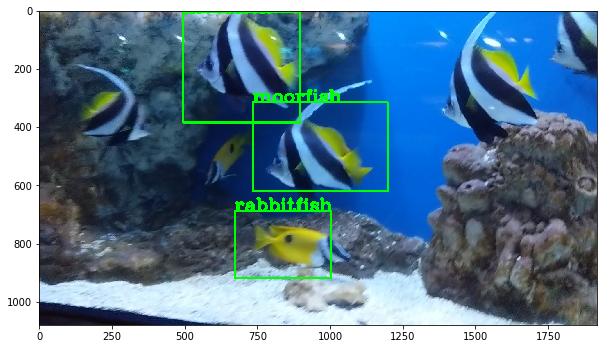

In [18]:
img2 = img

for i in range(len(result)):
    tl = (result[i]['topleft']['x'], result[i]['topleft']['y'])
    br = (result[i]['bottomright']['x'], result[i]['bottomright']['y'])
    label = result[i]['label']
    
    img2 = cv2.rectangle(img2, tl, br, (0, 255, 0), 5)
    img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)
    
    img2 = cv2.putText(img2, label, tl, fontFace = cv2.FONT_HERSHEY_COMPLEX, 
                   fontScale = 2, color = (0, 255, 0), thickness=8)

plt.figure(figsize=(10, 10))
plt.imshow(img2)
plt.show()